In [1]:
%matplotlib qt

In [2]:
import pathlib
import matplotlib
import matplotlib.pyplot as plt
import mne_bids
import mne

matplotlib.use('Qt5Agg')
mne.set_log_level('warning')

In [5]:
import pathlib
import mne

bids_root = pathlib.Path('out_data/sample_BIDS')

bids_path = mne_bids.BIDSPath(subject='01',
                              session='01',
                              task='audiovisual',
                              run='01',
                              datatype='meg',
                              root=bids_root)

raw = mne_bids.read_raw_bids(bids_path)
raw.load_data()
raw.filter(l_freq=0.1, h_freq=40)

# Example: Manually define events if no events.tsv is available
events = mne.find_events(raw, stim_channel='STI 014')  # Adjust stim_channel as per your data

tmin = -0.200
tmax = 0.500
baseline = (None, 0)

# Print events and event_id to verify contents
print(events)
event_id = {'some_event': 1, 'another_event': 2}  # Define event_id based on your events

epochs = mne.Epochs(raw,
                    events=events,
                    event_id=event_id,
                    tmin=tmin,
                    tmax=tmax,
                    baseline=baseline,
                    preload=True,
                    proj=False)
epochs.save(pathlib.Path('out_data') / 'epochs_for_source_epo.fif')
epochs.info



C:\Users\User\AppData\Local\Temp\ipykernel_9312\707707803.py:13: RuntimeWarning: Did not find any events.tsv associated with sub-01_ses-01_task-audiovisual_run-01.

The search_str was "out_data\sample_BIDS\sub-01\**\meg\sub-01_ses-01*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


[[ 27977      0      2]
 [ 28345      0      3]
 [ 28771      0      1]
 [ 29219      0      4]
 [ 29652      0      2]
 [ 30025      0      3]
 [ 30450      0      1]
 [ 30839      0      4]
 [ 31240      0      2]
 [ 31665      0      3]
 [ 32101      0      1]
 [ 32519      0      4]
 [ 32935      0      2]
 [ 33325      0      3]
 [ 33712      0      1]
 [ 34089      0      5]
 [ 34532      0      2]
 [ 34649      0     32]
 [ 34956      0      3]
 [ 35428      0      1]
 [ 35850      0      4]
 [ 36211      0      2]
 [ 36576      0      3]
 [ 37007      0      1]
 [ 37460      0      4]
 [ 37910      0      2]
 [ 38326      0      3]
 [ 38711      0      1]
 [ 39130      0      4]
 [ 39563      0      2]
 [ 39926      0      3]
 [ 40405      0      1]
 [ 40880      0      4]
 [ 41260      0      2]
 [ 41646      0      3]
 [ 42126      0      1]
 [ 42598      0      5]
 [ 42938      0     32]
 [ 42960      0      2]
 [ 43346      0      3]
 [ 43781      0      1]
 [ 44170      0 

Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,mne_anonymize
Participant,sub-01
Digitized points,146 points
Good channels,"203 Gradiometers, 102 Magnetometers, 9 Stimulus, 59 EEG, 1 EOG"
Bad channels,"MEG 2443, EEG 053"
EOG channels,EOG 061
ECG channels,Not available
Sampling frequency,600.61 Hz
Highpass,0.10 Hz
Lowpass,40.00 Hz


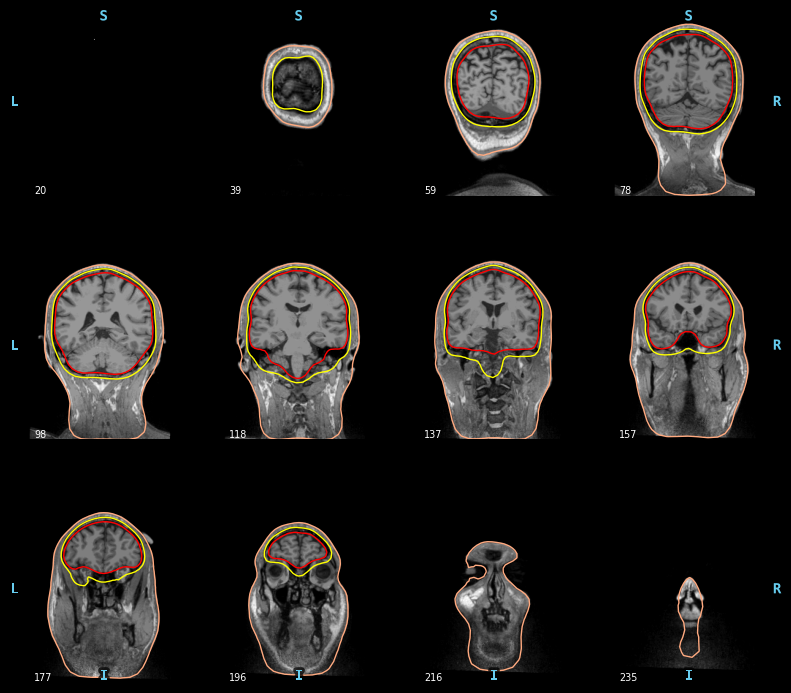

In [6]:
subjects_dir = pathlib.Path(mne.datasets.sample.data_path()) / 'subjects'

mne.viz.plot_bem(subject='sample', subjects_dir=subjects_dir,
                 orientation='coronal')

In [7]:
epochs_fname = pathlib.Path('out_data') / 'epochs_for_source_epo.fif'

mne.gui.coregistration(subject='sample', subjects_dir=subjects_dir,
                       inst=epochs_fname)

In [9]:
subject = 'sample'
src = mne.setup_source_space(subject=subject,
                             spacing='oct4',  # Use oct6 during an actual analysis!
                             subjects_dir=subjects_dir,
                             add_dist=False)  # Remove this one during an actual analysis!
src

<SourceSpaces: [<surface (lh), n_vertices=155407, n_used=258>, <surface (rh), n_vertices=156866, n_used=258>] MRI (surface RAS) coords, subject 'sample', ~22.7 MB>